# Group 1

## Name: Kendrick Kee UOW ID: 7366814

## Name: Mohamed Abrar Ismail Mohamed Thahir UOW ID: 7372747

## Name: Li Jin UOW ID:6650181

Classification Algorithms
- Random Forest
- Naive Bayes Classifier
- Decisioin Tree Classifier

In [2]:
# import needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV

from sklearn import metrics
from sklearn.metrics import accuracy_score

### Discover and visualise the data

In [3]:
# define the header for each columns
columns_name = ['date','Usage_kWh','Lagging_Current_Reactive.Power_kVarh','Leading_Current_Reactive_Power_kVarh','CO2(tCO2)','Lagging_Current_Power_Factor','Leading_Current_Power_Factor','NSM','WeekStatus','Day_of_week','Load_Type']

# read data from csv file
df = pd.read_csv('Steel_industry_data.csv', names = columns_name, skiprows=1)

# display the first 5 rows of data
df.head()


,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [4]:
# check the shape of the dataframe
df.shape

(35040, 11)

#### Findings:

(1) Based on the Pandas .shape property, it shows this dataframe contains 35040 rows and 11 columns(including target column).

In [5]:
# display all columns and their data types 
# and check whether each column contains null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

#### Findings:

(1) We use Pandas dataframe.info function gives a summary of this dataframe which shows that this dataframe has 11 columns(including target column), each column has 35040 rows, each column has no null values with values ranging from object, int64 and float64.

In [6]:
# view some basic statistical details of this dataframe
df.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


#### Findings:
1) Some of the columns are not represented in the statistical details of the dataset as columns WeekStatus, Day_of_week and Load_type are object variables and not numerical values.


2) Therefore we will nominaly ecode the columns as such
    
    WeekStatus = {"Weekday" = 0 , "Weekend" = 1}
    
    Day_of_week = {"Monday" = 0,"Tuesday" = 1,"Wednesday" = 2,"Thursday" = 3,"Friday" = 4,"Saturday"= 5,"Sunday" = 6}
    
    Load_Type = {"Light_Load" = 0,"Medium_Load" = 1, "Maximum_Load" = 2}
    

In [4]:
nominal_encode_values = {"WeekStatus":{"Weekday":0 , "Weekend":1},"Day_of_week":{"Monday" : 0,"Tuesday" : 1,"Wednesday" : 2,"Thursday" : 3,"Friday" : 4,"Saturday" : 5,"Sunday" : 6},"Load_Type":{"Light_Load" : 0,"Medium_Load" : 1, "Maximum_Load" : 2}}

In [5]:
encoded_df = df.replace(nominal_encode_values)
encoded_df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,0,0,0
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,0,0
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,0,0
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,0,0
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,0,0


In [8]:
#dropping "date" column as it is expected to not be a good indicator of predicting the load type of the day
encoded_df.drop("date",axis=1,inplace=True)
encoded_df.head()


,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,3.17,2.95,0.0,0.0,73.21,100.0,900,0,0,0
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,0,0
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,0,0
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,0,0
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,0,0


In [10]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Usage_kWh                             35040 non-null  float64
 1   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 2   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 3   CO2(tCO2)                             35040 non-null  float64
 4   Lagging_Current_Power_Factor          35040 non-null  float64
 5   Leading_Current_Power_Factor          35040 non-null  float64
 6   NSM                                   35040 non-null  int64  
 7   WeekStatus                            35040 non-null  int64  
 8   Day_of_week                           35040 non-null  int64  
 9   Load_Type                             35040 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 2.7 MB


In [11]:
# print out the skewness of each features

print('Skewness of features: ')
skewness = encoded_df.skew()
print(skewness)

Skewness of features: 
Usage_kWh                               1.197394
Lagging_Current_Reactive.Power_kVarh    1.437899
Leading_Current_Reactive_Power_kVarh    1.734314
CO2(tCO2)                               1.149355
Lagging_Current_Power_Factor           -0.606126
Leading_Current_Power_Factor           -1.511984
NSM                                     0.000000
WeekStatus                              0.952975
Day_of_week                             0.003109
Load_Type                               0.606465
dtype: float64


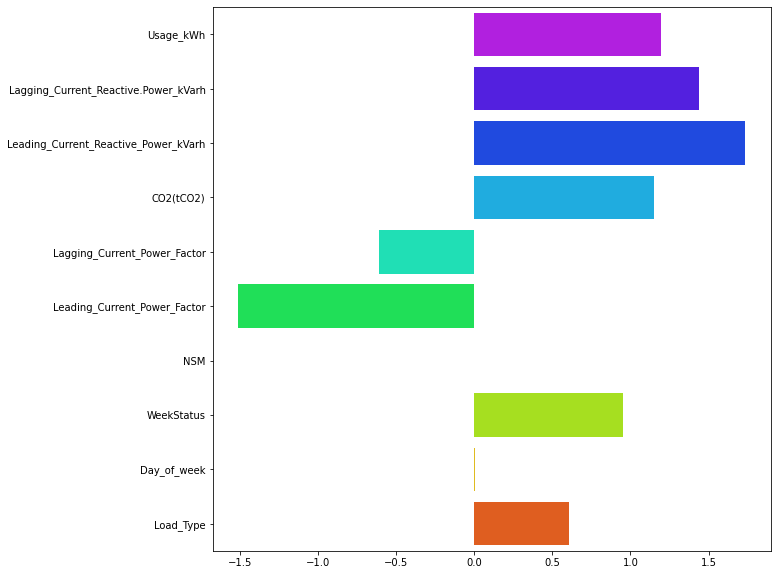

In [12]:
# set up the figure size 
plt.figure(figsize=(10,10))

# plot out the diagram to have a clear view of the skewness
sns.barplot(x=encoded_df.skew(), y=skewness.index, palette = 'gist_rainbow_r')

# show the plot
plt.show()

#### Findings:

(1) Features "Usage_kWh ","Lagging_Current_Reactive.Power_kVarh","Leading_Current_Reactive_Power_kVarh","CO2(tCO2)" are extremely right skewed with the scores of 1.197394, 1.437899, 1.734314, 1.149355 respectively.
                              
   
   
                              


(2) The feature 'Leading_Current_Power_Factor' is extremely left skewed which scores -1.511984.
           

In [231]:
#  returns the correlation matrix of the dataframe
corr_matrix = encoded_df.corr()
corr_matrix = corr_matrix['Load_Type'].sort_values(ascending=False)
corr_matrix.head()

Load_Type                       1.000000
Usage_kWh                       0.614570
CO2(tCO2)                       0.610653
Lagging_Current_Power_Factor    0.519189
NSM                             0.482767
Name: Load_Type, dtype: float64

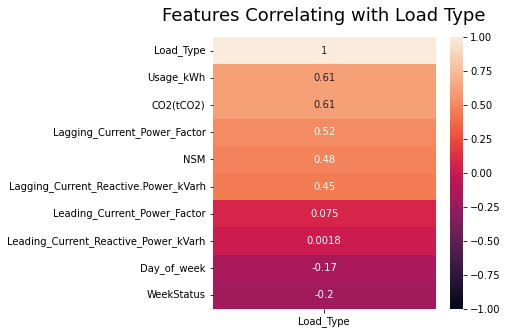

In [14]:
# visualize the correlation of all columns in this dataframe
plt.figure(figsize=(5, 5))
heatmap = sns.heatmap(encoded_df.corr()[['Load_Type']].sort_values(by='Load_Type', ascending=False), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Features Correlating with Load Type', fontdict={'fontsize':18}, pad=16);

#### Findings:
(1) There seems to be positive correlations against target value 'Load_Type'
    with 'Usage_kWh','CO2(tCO2)','Lagging_Current_Power_Factor',
    'Leading_Current_Power_Factor', 'NSM' with p value close to and greater than 0.5              

In [15]:
# show the tota number of load types in this set
encoded_df.groupby('Load_Type').size()

Load_Type
0    18072
1     9696
2     7272
dtype: int64

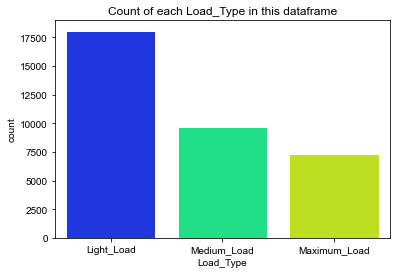

In [16]:
# visualize the count of each 'Cover_Type' in this dataframe
plt.title('Count of each Load_Type in this dataframe')
sns.set_style('whitegrid')
sns.countplot(x=df['Load_Type'], palette = 'gist_rainbow_r')

plt.show()

#### Findings:
(1) The most common load type is "Light_Load" of which consists of the count of 18072 contributing to more than half of the entire data set. Whilst "Medium_Load" and "Maximum_Load" are almost evenly distributed amongst the remaining observations.

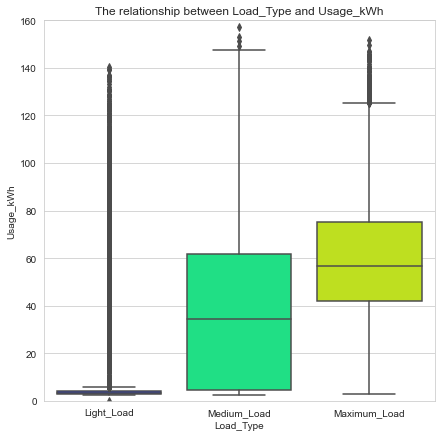

In [17]:
# Visualize the relationship between Load Type and Usage_kWh
plt.figure(figsize=(7, 7))
plt.title('The relationship between Load_Type and Usage_kWh')

g = sns.boxplot(data=df, x='Load_Type', y='Usage_kWh', palette='gist_rainbow_r')
g.set_ylim(0,160)
plt.show()

#### Findings:

(1) There seems to be high variance between each load type against Usage_kwh, especially with Light_Load having the exterme amount of outliers which may skew an accurate relation between usage_kwh and load_type.

(2) Medium_Load has the least amount of outliers.

(3) Not accounting for outliers, light load should be easily distinguishable from Medium and Maximum Load.

(4) Medium and Maximum load seems pretty similar and might cause difficulties in differentiating them.

(5) This feature alone might not be a good fit for model accuracy if used alone.

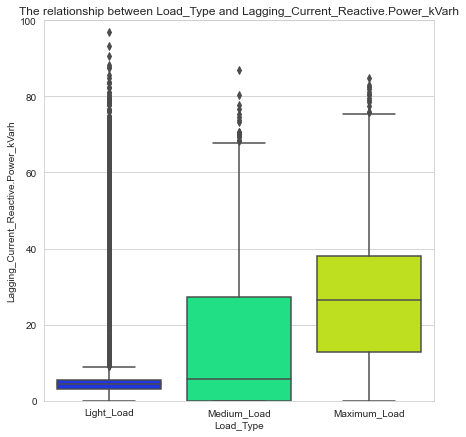

In [18]:
# Visualize the relationship between Load_Type and Lagging_Current_Reactive.Power_kVarh
plt.figure(figsize=(7, 7))
plt.title('The relationship between Load_Type and Lagging_Current_Reactive.Power_kVarh')
g = sns.boxplot(data=df, x='Load_Type', y='Lagging_Current_Reactive.Power_kVarh', palette='gist_rainbow_r')
g.set_ylim(0,100)
plt.show()

#### Findings:

(1) Obversing a pattern that regardless of features, Light_load consists of alot of outliers this may suggest that Light_loads will be difficult to predict.

(2) The median of all 3 loads are relatively close suggesting that this feature is not a good discriminative feature.

(3) Medium load seems to have a very low quartile range.

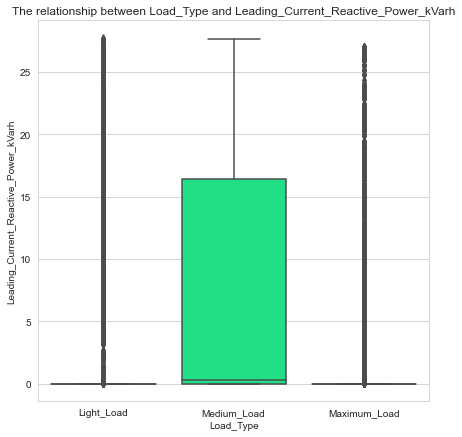

In [19]:
# Visualize the relationship between Load_Type and Leading_Current_Reactive_Power_kVarh
plt.figure(figsize=(7, 7))
plt.title('The relationship between Load_Type and Leading_Current_Reactive_Power_kVarh')
sns.boxplot(data=df, x='Load_Type', y='Leading_Current_Reactive_Power_kVarh', palette='gist_rainbow_r')

plt.show()

#### Findings:

(1) Large amounts of outliers observed in Light and Maximum load. This suggest that Leading_Current_Reactive_Power_kVarh is not a good feature in determining load type.

(2) Medium Load does not have any outliers.

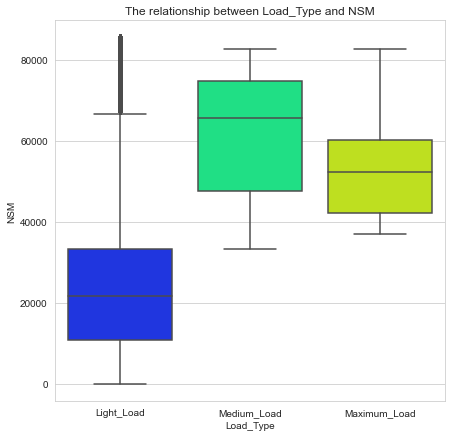

In [20]:
# Visualize the relationship between Load_Type and NSM
plt.figure(figsize=(7, 7))
plt.title('The relationship between Load_Type and NSM')
sns.boxplot(data=df, x='Load_Type', y='NSM', palette='gist_rainbow_r')

plt.show()

#### Findings:

(1) The inter quartile range of Light_Load seems to be in a range which does not overlap with Medium or Maximum Load

(2) Light_Load still follows the trend of consisting of excessive outliers.

(3) the inter-quartile range of Medium and Maximum Load appears to have large overlap hinting that NSM is not a good feature in differenciating both of these data

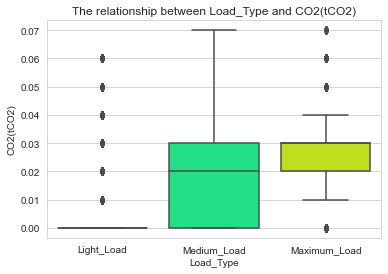

In [22]:
# Visualize the relationship between Load_Type and CO2
plt.title('The relationship between Load_Type and CO2(tCO2)')
sns.boxplot(data=df, x='Load_Type', y='CO2(tCO2)', palette='gist_rainbow_r')

plt.show()

### Findings
(1) The interquartile range for light_load does not appear to exist, this could be due to majority of the CO2 values are 0.00 for CO2

(2) The interquartile range of Maximum_Load appears to be in between 0.03 and 0.02 hence no median was plotted in the diagram.

(3) Medium_Load appears to be the only load type without any outliers hinting that the values are evenly distributed.

(4) We can observe that C02 is only measured and stored at every 0.01 intervals.


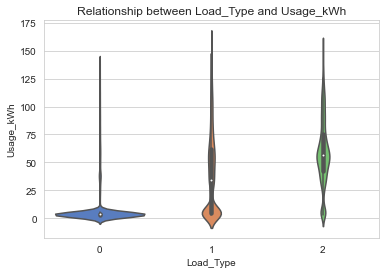

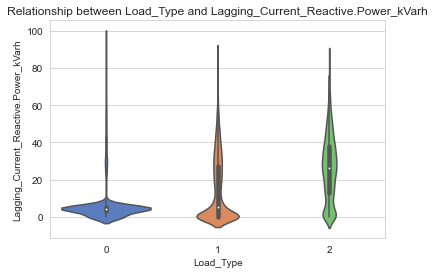

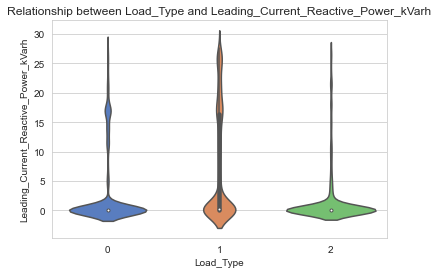

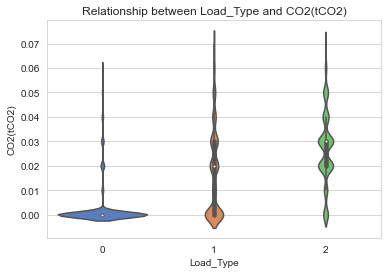

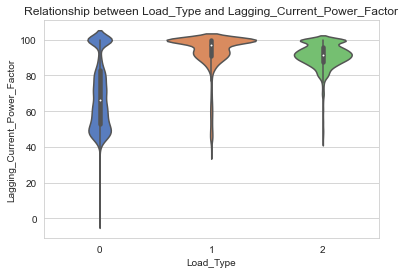

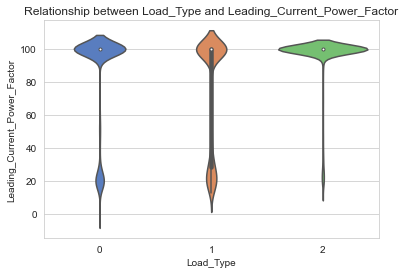

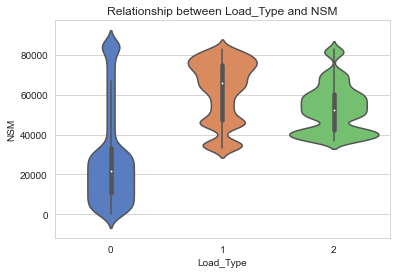

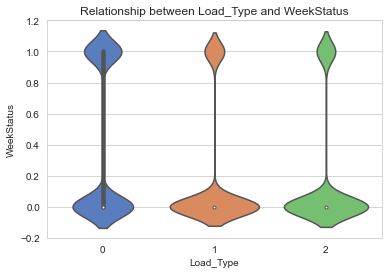

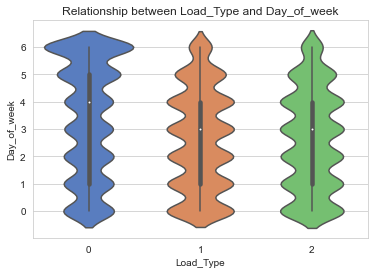

In [87]:
# get all the columns name
all_columns = encoded_df.columns

# eliminate the target column
eliminate_target = len(all_columns)-1

# x-axis is for target column
x = all_columns[eliminate_target]

# y-axis is for the features
y = all_columns[0:eliminate_target]

# plot out the graph
for a in range(0, 9):
    sns.violinplot(data=encoded_df, x=x, y=y[a], palette="muted")
    
    # set the title for each of the graphes
    plt.title('Relationship between Load_Type and ' + all_columns[a])
    plt.show()

#### Findings:

(1) Based on the 9 violinplot graphes above, Week days usually has more Light_Loads as compared to weekends, and vice versa.

(2) Light_Load largest Day_of_Week is sunday as compared to other Load_types where sundays usually have the lowest occurences.

(3) Leading_Current_Power_Factor seems to consist of alot of outliers for all Load_Types

(4) CO2 of 0.00 is heavily correlated to Light_Load whilst other CO2 values are evenly distributed amongst Medium and Maximum_Load

(5) Leading_Current_Reactive_Power_kVarh seems to be skewed towards a 0 values for all Load_Types.

(6) Lower NSM < 30000, seems to only exist in Light_Loads while the remainder observations occur evenly between Medium and Maximum Load, with some outliers in Light_Loads

### Prepare the data for machine learning algorithms

### We first check if the dataset consist of any missing values 

In [6]:
# Check any missing data for each columns
print(encoded_df.isnull().values.any())

False


#### Findings:

(1) It gives a False result which means that this dataframe does not consist any null values.

In [128]:
# seperate the dataset as feature variables and response variable and store them to X and y variables
X = encoded_df.drop('Load_Type', axis=1)
y = encoded_df['Load_Type']

# use StratifiedShuffleSplit to split the data 
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42069)
sss.get_n_splits(X,y)

# using for loop to do the splits
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#double check the size of the dataframe     
print(X_train.shape , X_test.shape)
print(y_train.shape , y_test.shape)

# using StandardScalar to help us improve the accuracy of the prediction model
scalar = StandardScaler()

# fit and transform the train data
X_train = scalar.fit_transform(X_train)

# transform the test data
X_test = scalar.transform(X_test)


(28032, 9) (7008, 9)
(28032,) (7008,)


#### Findings:

(1) After we used StratifiedShuffleSplit to split the data, now the amount of training data becomes 28032 and the amount of testing data becomes 7008.

## 3 Clssification Models

### (1) Random Forest

In [10]:
# instantiate the RandomForestClassifier() model
rfc = RandomForestClassifier(n_estimators=150, max_depth=15, criterion='gini', random_state=42069, n_jobs=-1)

# fit the model with X_train and y_train
rfc.fit(X_train, y_train)


RandomForestClassifier(max_depth=15, n_estimators=150, n_jobs=-1,
                       random_state=42069)

In [11]:
# make prediction with X_test
y_pred = rfc.predict(X_test)

# check our models performance
print(f'{metrics.accuracy_score(y_test, y_pred)*100}')

91.1244292237443


In [12]:
# check for overfitting
# using X_train to do predict and compare with X_test result
y_pred = rfc.predict(X_train)

# check our models performance
print(f'{metrics.accuracy_score(y_train, y_pred)*100}')

96.02953767123287


#### Findings:
    
(1) Based on the above result, we can see that with user defined parameters for the Random Rorest Classifier (n_estimators=150, max_depth=15, criterion='gini') which give us 91% accuracy for the testing set. In contrast, using the model on the testing set yielded a better result with an accuracy of 96%. We can therefore conclude that the model does not display signs of overfitting and has therefore obtained generalization of the dataset. 

### Tuning the Random Forest model

In [47]:
# instantiate the RandomForestClassifier model and set the random_state =  42069 to make sure we can get the same result everytime
rdfc = RandomForestClassifier(random_state=42069)

# set the hyperparameters for the gridsearchcv to choose the best one
rdfc_param = {
              'n_estimators':[100, 150, 300, 450, 500, 700],
              "criterion": ["gini", "entropy"],
              'max_depth': [13 ,15, 17, 19],
              'max_features':['auto', 'sqrt']
             }

# instantiate the gridsearchcv to get the hyperparameter
rdfc_gscv = GridSearchCV(estimator=rdfc, param_grid=rdfc_param, cv=3, n_jobs=-1)

# fit the model with X_train and y_train
rdfc_gscv.fit(X_train, y_train)

# check the best performance of parameters
print(rdfc_gscv.best_params_)

# print out the result
print(rdfc_gscv.best_score_)

{'criterion': 'gini', 'max_depth': 19, 'max_features': 'auto', 'n_estimators': 700}
0.9107805365296803


In [48]:
# check for overfitting
# using X_train to do predict and compare with X_test result
y_pred = rdfc_gscv.predict(X_train)

# check our models performance
print('Accuracy : ',metrics.accuracy_score(y_train, y_pred)*100 ,'%')

Accuracy :  98.52311643835617 %


#### Findings:

After tuning the model:

(1) First, we can see that the accuracy becomes 91% compared to the prior 91% (without tuning) shows no significant improvement in the model even with optimised parameters.

(2) Next, the tuning model do a prediction of the testing set data is 98% and when predict the training data which get a result of 91%. The model outperforms the training set accuracy by 7% which reinforces the fact that no overfitting has occured and the model is able to generalise the information from the dataset.

(3) We can observe that increasing depth also improves model performance in terms of accuracy as the pre-tuned model uses a max depth of 15 and the best depth determined from GridSearch which is 19 the difference in accuracy is 2.5% of which a deeper tree had the better outcome. We therefore can conclude that increasing depth will improve performance of the model if computational resources is not a limiting factor.

(4) We can observe that increasing n_estimators from 150 to 700 also improves model performance by 2.5%, this is expected as increasing the number of trees will improve model accuracy at the cost of computational resources. Therefore, we can conclued that increasing n_estimators will improve model accuracy. 

### (2) Naive Bayes Classifier

In [13]:
# instantiate the GaussianNB() model
nbc = GaussianNB(var_smoothing=3e-9)

# fit the model with X_train and y_train
nbc.fit(X_train, y_train)

# make prediction with X_test
y_pred = nbc.predict(X_test)

# check our models performance
print(metrics.accuracy_score(y_test, y_pred))


0.704337899543379


In [14]:
# check for overfitting
# using X_train to do predict and compare with X_test result
y_pred = nbc.predict(X_train)

# check our models performanc
print(accuracy_score(y_train, y_pred))

0.7092965182648402


#### Findings:

(1) Setting the parameter for the GaussianNB as (var_smoothing=3e-9) offers a accuracy score of 70.4% for the training dataset. When using this model to predict testing dataset, it gives an accuracy of 70.9%. As the difference between both the training and testing dataset is 0.5% accuracy, we can conclude that the model does not show signs of overfitting and has displayed the ability to generalize.

### Tuning the Naive Bayes Classifier

In [19]:
# instantiate the GaussianNB() model
nbc2 = GaussianNB()

# set the hyperparameters for the gridsearchcv to choose the best one
# use var_smoothing as the hyperparameter
params = {'var_smoothing': np.logspace(0,-9, num=100)}

# using gridsearchcv to get the best hyperparameter
nbc2_gscv = GridSearchCV(estimator=nbc2, param_grid=params, cv=3, n_jobs=-1, scoring='accuracy') 

# fit the model with X_train and y_train
nbc2_gscv.fit(X_train, y_train)

# check the best performance of parameters
print(nbc2_gscv.best_params_)

# print out the result
print(nbc2_gscv.best_score_)

{'var_smoothing': 6.579332246575683e-05}
0.709724600456621


In [11]:
# check for overfitting
# using X_train to do predict and compare with X_test result
y_pred = nbc2_gscv.predict(X_train)

# check our models performanc
print(accuracy_score(y_train, y_pred))

0.7092965182648402


#### Findings：

After tuning the model:

(1) First, we can see that the accuracy becomes 70.9% which compared with the prior accuracy of 70.4% (without tuning) had a insignificant improvement of 0.5% in accuracy.

(2) Next, the tuning model do a prediction of the testing set data is 70.9% and when predict the training data which get a result of 70.9%. As both accuracy of the models on both training and testing dataset are identical, we can conclude the there was no overfitting present.

(3) For parameter 'var_smoothing', GridSearchCV evaluated that "6.579332246575683e-05 "as the best value for the model oout of the nums parameters in np.logspace of 100. We therefore can conclude that the higher the var_smoothing, the better the overall performance of the model.

### (3) Decision Tree classifier

In [53]:
# instantiate the DecisionTreeClassifier() model
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=13, random_state=42069)

# fit the model with X_train and y_train
dtc.fit(X_train, y_train)

# make prediction with X_test
y_pred = dtc.predict(X_test)

# check our models performance
print(metrics.accuracy_score(y_test, y_pred))

0.89925799086758


In [54]:
# check for overfitting
# using X_train to do predict and compare with X_test result
y_pred = dtc.predict(X_train)

# check our models performance
print(metrics.accuracy_score(y_train, y_pred))

0.9224457762557078


#### Findings:

(1) For the parameters criterion="entropy", max_depth=13, random_state=42069 it produces an accuracy of 89% on the training dataset. In perspective, the performance of the model on the testing dataset is 92% which is 3% higher that it's performance on the training dataset. We can therefore conclude that the model shows no signs of overfitting.

### Tuning the Decisioin Tree Classifier

In [55]:
# tuning the Decision Tree model

# instantiate the DecisionTreeClassifier() model
dtc2 = DecisionTreeClassifier(random_state=42069)

# set the hyperparameters for the gridsearchcv to choose the best one
dtc_param = { 
              "criterion": ["gini", "entropy"],
              "max_depth": [4, 7, 10, 13, 17, 20],
              "min_samples_leaf": [1, 2, 3, 4, 5]
             }

# using gridsearchcv to get the best hyperparameter
dtc_gscv = GridSearchCV(estimator=dtc2, param_grid=dtc_param, cv=3, n_jobs=-1)

# fit the model with X_train and y_train
dtc_gscv.fit(X_train, y_train)

# check the best performance of parameters
print(dtc_gscv.best_params_)

# print out the result
print(dtc_gscv.best_score_)


{'criterion': 'entropy', 'max_depth': 13, 'min_samples_leaf': 4}
0.8950841894977168


In [56]:
# check for overfitting
# using X_train to do predict and compare with X_test result
y_pred = dtc_gscv.predict(X_train)

# check our models performance
print(metrics.accuracy_score(y_train, y_pred))

0.9178795662100456


##### Findings:

After tuning the model:

(1) First, we can see that the accuracy becomes 89.5% which compared to the prior accuracy of 89.9% (without tuning) has a insignificant reduction of 0.4% in model accuracy in the training dataset.

(2) With regards to the accuracy of the model on the testing set data, 91.7% is achieved compared to 89.5% on the training dataset. As the difference in the accuracy is indignificant, we can conclude that the model does not show signs of overfitting pre and post tuning.

(3) Between using gini or entropy as the split criteria, entropy split is presented to yield a better result by GridSearchCV.

(4) We can also observe that using the range of parameters to tune the model played no significant role in its performance, paramters such as "criterion": ["gini", "entropy"],"max_depth": [4, 7, 10, 13, 17, 20],"min_samples_leaf": [1, 2, 3, 4, 5] ranges yielded only a 0.5% reduction in model accuracy. We can therefore conclude that pre tuned parameters of max_depth 13 and entropy as a split criteria to be the most optimal for the model.


#### Finding of comparing these 3 classification models above:
    
Of the 3 classification models: Random Forest model, Naive Bayes Classifier model and Decisioin Tree Classifier model.

We can observe that Random Forest model was able to outperform the latter boasting an accuracy of 98% post tuning with on the testing dataset which signals that its able to achieve the best performance of the other models without overfitting.

The 3 models were also not prone in overfitting or underfitting the dataset provided in this assignment. This could be due to the fact that my team only used significantly correlated features to train the model instead of using all features provided in the dataset which allowed for significant noise reduction and better performance.

Of all 3 models, Naive Bayes Model performed the worst with an accuracy of 70%~ pre and post tuning whilst showing no signs of overfitting. We therefore can assume that the selected model has reached it performance capacity for its use case in this current data set.


## User-Defined Transform functionality

In [232]:
# define a class to generate a user-defined-transform function
class UserDefinedTransform(BaseEstimator, TransformerMixin):
    # initialize the constructor
    def __init__(self, NSM_lvl=True):
        self.NSM_lvl = NSM_lvl
    
    # define a fit function
    def fit(self, X, y=None):
        return self
    
    # define a transform function 
    def transform(self, X, y=None):
        # using if else statement to take different actions
        if self.NSM_lvl:
            
            # divide into the different elevation range and insert them into the columns called NSM_Level
            df['NSM_Level'] = pd.cut(df['NSM'], 5, precision=0, labels=[1,2,3,4,5])
            
            # insert the column Elevation_Group to the right position
            NSM_lvl = df.pop('NSM_Level')
            df.insert(1, 'NSM_Level', NSM_lvl)
            
            # retrun the result
            return np.c_[X, NSM_lvl]
        else:
            # alert the user if got any error to create a new feature
            return print("Please check the values of 'NSM_Level'")

#### Findings:

(1) We generate a new feature called 'NSM_Level' since the feature 'NSM' appear across a wide range of values and may be noisy for the models to use as a predictive feature.

(2) The new feature 'NSM_Level' has categorize the NSM values into 5 integers of 1, 2, 3, 4, 5. 5 values were picked as NSM as previously mentioned covers a large range of values hence to prevent any loss of information, more "partitions" will be created in its place.


In [200]:
temp = encoded_df
temp.shape

(35040, 10)

In [201]:
cn = list(temp.columns)
cn.append("NSM_Level")
cn

['Usage_kWh',
 'Lagging_Current_Reactive.Power_kVarh',
 'Leading_Current_Reactive_Power_kVarh',
 'CO2(tCO2)',
 'Lagging_Current_Power_Factor',
 'Leading_Current_Power_Factor',
 'NSM',
 'WeekStatus',
 'Day_of_week',
 'Load_Type',
 'NSM_Level']

In [202]:
# create the class object and transfrom the new feature then show the shape of dataframe which excluding the target column
attr_adder = UserDefinedTransform(NSM_lvl=True)
temp = pd.DataFrame(data= attr_adder.transform(temp),columns=cn)
temp.shape

(35040, 11)

#### Findings:

(1) After transform the new feature ('NSM_Level'), temp dataframe contains 35040 rows and 11 columns.

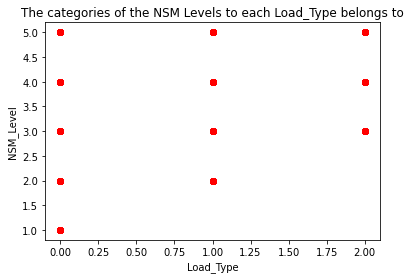

In [205]:
plt.scatter(temp['Load_Type'], temp['NSM_Level'], c='red')

# set the graph title
plt.title('The categories of the NSM Levels to each Load_Type belongs to')

# set the xlabel and ylabel
plt.xlabel('Load_Type')
plt.ylabel('NSM_Level')

# show the graph
plt.show()

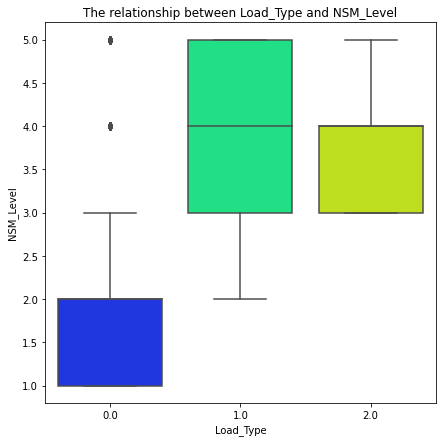

In [206]:
# Visualize the relationship between Load_Type and NSM_Level
plt.figure(figsize=(7, 7))
plt.title('The relationship between Load_Type and NSM_Level')
sns.boxplot(data=temp, x='Load_Type', y='NSM_Level', palette='gist_rainbow_r')

plt.show()

### Findings
(1) As we can observe, NSM_Level if 1-5 occurs for all Light_Loads while NSM_Level 1 is never present in Medium_Load, while Maximum_Load only has NSM_Load levels of 3 and above.

(2) Therefore, we can attempt to use this in place of NSM to improve a model's performance as the values are more discrete.

## Training Model with new feature (NSM_Level)

In [222]:
# seperate the dataset as feature variables and response variable and store them to X and y variables
X = temp.drop('Load_Type', axis=1)
X = temp.drop('NSM',axis = 1)
y = temp['Load_Type']

# use StratifiedShuffleSplit to split the data 
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=123)
sss.get_n_splits(X,y)

# using for loop to do the splits
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#double check the size of the dataframe     
print(X_train.shape , X_test.shape)
print(y_train.shape , y_test.shape)

# using StandardScalar to help us improve the accuracy of the prediction model
scalar = StandardScaler()

# fit and transform the train data
X_train = scalar.fit_transform(X_train)

# transform the test data
X_test = scalar.transform(X_test)


(28032, 10) (7008, 10)
(28032,) (7008,)


## Using new data splits to train Decision Tree Classifier

In [229]:
# instantiate the DecisionTreeClassifier() model
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=123)

# fit the model with X_train and y_train
dtc.fit(X_train, y_train)

# make prediction with X_test
y_pred = dtc.predict(X_test)

# check our models performance
print(metrics.accuracy_score(y_test, y_pred))

1.0


In [230]:
# check for overfitting
# using X_train to do predict and compare with X_test result
y_pred = dtc.predict(X_train)

# check our models performance
print(metrics.accuracy_score(y_train, y_pred))

1.0


### Findings
(1) Training a Decision Tree model, we were able to reduce the DT max_depth to 3 and still be able to yield a 100% accuracy on both the training and testing datasets. This ensures that the model was not overfitted and simply by transforming the NSM features into 5 bins/partitions, we were able to get the model accuracy from 70%~ to 100%.